In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
from itertools import product

In [3]:
df = pd.read_csv('./data/State of Data 2021 - Dataset - Pgina1.csv')

<ipython-input-3-6de894b5cf24>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/State of Data 2021 - Dataset - Pgina1.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Columns: 356 entries, ('P0', 'id') to ('P9_a_g ', 'Ainda não conhecia o Data Hackers')
dtypes: float64(293), int64(7), object(56)
memory usage: 7.2+ MB


In [5]:
df.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')",...,"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')","('P9_a_a ', 'Blog/Medium do Data Hackers')","('P9_a_b ', 'Podcast do Data Hackers')","('P9_a_d ', 'Newsletter Semanal')","('P9_a_e ', 'Canal do Slack')","('P9_a_f ', 'Canal do Youtube do Data Hackers')","('P9_a_g ', 'Ainda não conhecia o Data Hackers')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Podcast do Data Hackers",0,1,1,0,0,0
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Blog/Medium do Data Hackers",1,0,1,0,0,0
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,0,0,0,0
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,Ainda não conhecia o Data Hackers,0,0,0,0,0,1
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Podcast do Data Hackers, Canal do Slack, Newsl...",0,1,1,1,0,0


In [6]:
df["('P1_a ', 'Idade')"].describe()

count    2617.00000
mean       31.15705
std         7.13062
min        18.00000
25%        26.00000
50%        30.00000
75%        35.00000
max        54.00000
Name: ('P1_a ', 'Idade'), dtype: float64

In [7]:
columns=df.columns

In [8]:
list(columns)

["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_a ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_e ', 'Estado onde mora')",
 "('P1_e_a ', 'uf onde mora')",
 "('P1_e_b ', 'Regiao onde mora')",
 "('P1_g_b ', 'Regiao de origem')",
 "('P1_g_c ', 'Mudou de Estado?')",
 "('P1_h ', 'Nivel de Ensino')",
 "('P1_i ', 'Área de Formação')",
 "('P2_a ', 'Qual sua situação atual de trabalho?')",
 "('P2_b ', 'Setor')",
 "('P2_c ', 'Numero de Funcionarios')",
 "('P2_d ', 'Gestor?')",
 "('P2_e ', 'Cargo como Gestor')",
 "('P2_f ', 'Cargo Atual')",
 "('P2_g ', 'Nivel')",
 "('P2_h ', 'Faixa salarial')",
 "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
 "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
 "('P2_k ', 'Você está satisfeito na sua empresa atual?')",
 "('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')",
 "('P2_l_a ', 'Falta de oportunidade de cresciment

In [9]:
colunas_p1= [col for col in df.columns if 'P1' in col]
df_p1=df[colunas_p1]

colunas_p2= [col for col in df.columns if 'P2' in col]
df_p2=df[colunas_p2]

colunas_p3= [col for col in df.columns if 'P3_a' in col or 'P3_b' in col ]
df_p3=df[colunas_p3]

colunas_p4= [col for col in df.columns if 'P4' in col]
df_p4=df[colunas_p4]

colunas_p8= [col for col in df.columns if 'P8' in col]
df_p8=df[colunas_p8]

In [10]:
df["('P2_h ', 'Faixa salarial')"].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     479
de R$ 4.001/mês a R$ 6.000/mês      403
de R$ 6.001/mês a R$ 8.000/mês      393
de R$ 12.001/mês a R$ 16.000/mês    263
de R$ 3.001/mês a R$ 4.000/mês      183
de R$ 2.001/mês a R$ 3000/mês       180
de R$ 16.001/mês a R$ 20.000/mês    129
de R$ 1.001/mês a R$ 2.000/mês      126
de R$ 20.001/mês a R$ 25.000/mês     62
de R$ 25.001/mês a R$ 30.000/mês     43
de R$ 30.001/mês a R$ 40.000/mês     38
Acima de R$ 40.001/mês               34
Menos de R$ 1.000/mês                32
Name: ('P2_h ', 'Faixa salarial'), dtype: int64

In [11]:
df_ds = df[df["('P2_f ', 'Cargo Atual')"] == "Cientista de Dados/Data Scientist"]
df_ds["('P2_h ', 'Faixa salarial')"].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     95
de R$ 6.001/mês a R$ 8.000/mês      78
de R$ 4.001/mês a R$ 6.000/mês      50
de R$ 12.001/mês a R$ 16.000/mês    42
de R$ 1.001/mês a R$ 2.000/mês      22
de R$ 3.001/mês a R$ 4.000/mês      20
de R$ 16.001/mês a R$ 20.000/mês    15
de R$ 2.001/mês a R$ 3000/mês       14
de R$ 30.001/mês a R$ 40.000/mês     5
de R$ 20.001/mês a R$ 25.000/mês     5
Menos de R$ 1.000/mês                5
Acima de R$ 40.001/mês               3
de R$ 25.001/mês a R$ 30.000/mês     3
Name: ('P2_h ', 'Faixa salarial'), dtype: int64

In [12]:
df["('P4_a ', 'Atuacao')"].value_counts()

Análise de Dados                      849
Gestor                                508
Ciência de Dados                      412
Engenharia de Dados                   404
Buscando emprego na área de dados.    244
Outra                                 228
Name: ('P4_a ', 'Atuacao'), dtype: int64

In [13]:
df["('P2_f ', 'Cargo Atual')"].value_counts()

Cientista de Dados/Data Scientist                          357
Analista de BI/BI Analyst/Analytics Engineer               338
Analista de Dados/Data Analyst                             324
Engenheiro de Dados/Data Engineer                          300
Outro                                                      113
Analista de Negócios/Business Analyst                       96
Desenvolvedor ou Engenheiro de Software                     92
Engenheiro de Machine Learning/ML Engineer                  48
Outras Engenharias (não inclui dev)                         33
Estatístico                                                 25
Analista Administrativo                                     18
Analista de Inteligência de Mercado/Market Intelligence     18
Analista de Marketing                                       14
DBA/Administrador de Banco de Dados                         14
Analista de Sistemas/Analista de TI                         14
Técnico                                                

In [14]:
print(df_p1.shape)
print(df_p2.shape)
print(df_p3.shape)
print(df_p4.shape)
print(df_p8.shape)


(2645, 10)
(2645, 35)
(2645, 11)
(2645, 117)
(2645, 47)


In [15]:
df_a =pd.concat([df_p1, df_p2, df_p3,df_p4["('P4_a ', 'Atuacao')"]], axis=1)
df_a

,"('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')",...,"('P3_b_a ', 'Analytics Engineer')","('P3_b_b ', 'Engenharia de Dados/Data Engineer')","('P3_b_c ', 'Analista de Dados/Data Analyst')","('P3_b_d ', 'Cientista de Dados/Data Scientist')","('P3_b_e ', 'Database Administrator/DBA')","('P3_b_f ', 'Analista de Business Intelligence/BI')","('P3_b_g ', 'Arquiteto de Dados/Data Architect')","('P3_b_h ', 'Data Product Manager/DPM')","('P3_b_i ', 'Business Analyst')","('P4_a ', 'Atuacao')"
0,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,Química / Física,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Gestor
1,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Gestor
2,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Computação / Engenharia de Software / Sistemas...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Gestor
3,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,Outras,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Gestor
4,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Outras Engenharias,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Gestor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,40.0,40-44,Masculino,São Paulo (SP),SP,Sudeste,Sudeste,1,Não tenho graduação formal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buscando emprego na área de dados.
2641,27.0,25-29,Masculino,Santa Catarina (SC),SC,Sul,Sul,1,Graduação/Bacharelado,Estatística/ Matemática / Matemática Computaci...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ciência de Dados
2642,24.0,22-24,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Engenharia de Dados
2643,38.0,35-39,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buscando emprego na área de dados.


In [16]:
df_a["('P1_a ', 'Idade')"].fillna(56,inplace=True)

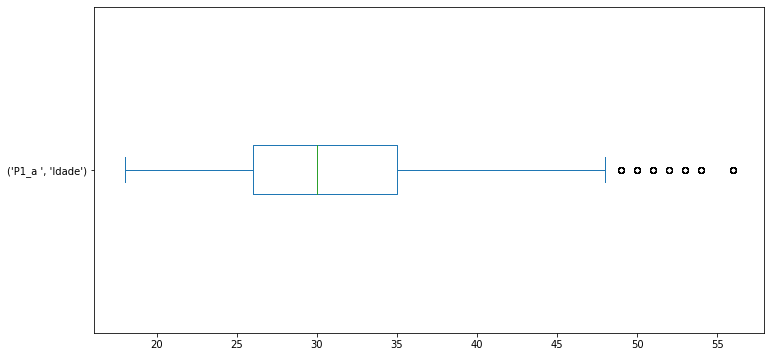

In [17]:
# boxplot idade fizemos em Pandas (Check)
df_a["('P1_a ', 'Idade')"].plot(kind='box', figsize=(12,6), vert=False);

# FARLEY FAÇA SUA MÁGICA!!!

<AxesSubplot:xlabel="('P1_a ', 'Idade')", ylabel="('P1_b ', 'Genero')">

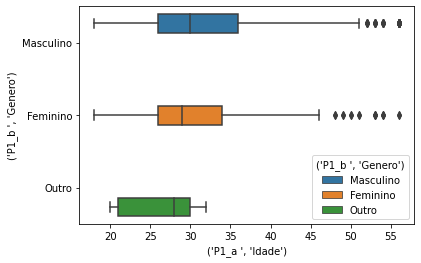

In [18]:
#seaborn.boxplot(*, x=None, y=None, hue=None, data=None
sns.boxplot(data=df_a, x="('P1_a ', 'Idade')", y="('P1_b ', 'Genero')", hue="('P1_b ', 'Genero')")

[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Boxplot Idade por Gênero')]

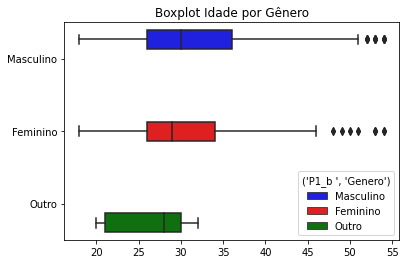

In [19]:
ax = sns.boxplot(data=df, x="('P1_a ', 'Idade')", y="('P1_b ', 'Genero')", hue="('P1_b ', 'Genero')", palette=['blue','red','green'], orient='h')
ax.set(xlabel="",ylabel="",title='Boxplot Idade por Gênero')

In [20]:
df_ensino = df_a["('P1_h ', 'Nivel de Ensino')"].value_counts().reset_index()
df_ensino.shape[0]

7

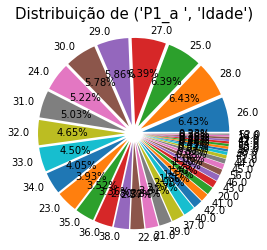

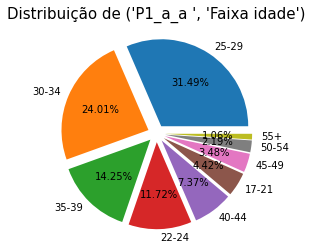

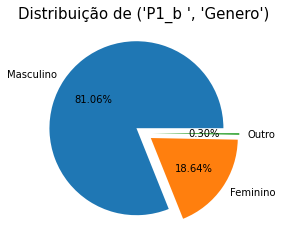

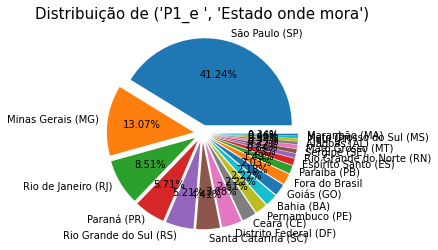

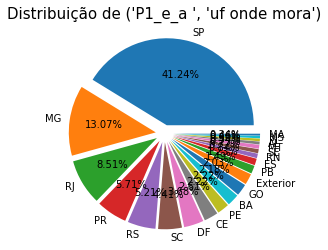

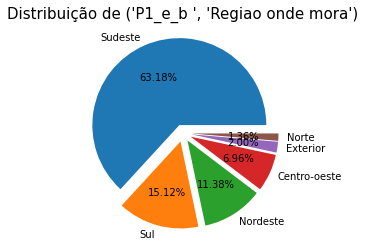

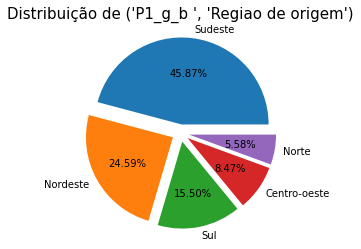

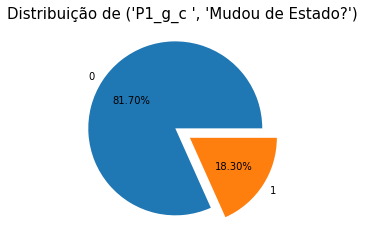

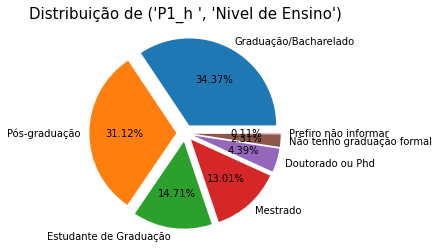

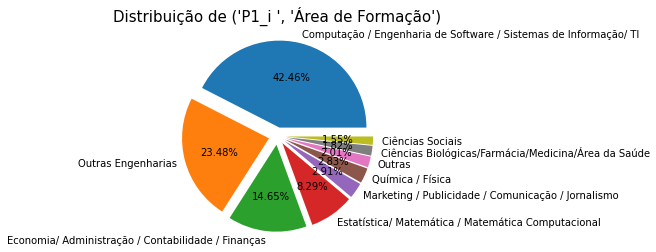

In [21]:
for col in df_p1.columns:

    df_var= df_a[col].value_counts().reset_index()
    plt.pie(col, data=df_var, labels = 'index', autopct='%.2f%%', explode = [0.1]*df_var.shape[0])
    plt.title('Distribuição de '+str(col), fontsize=15)
    plt.show()

In [22]:
df_a["'P1_b ', 'Genero'"].value_counts().reset_index()

KeyError: "'P1_b ', 'Genero'"

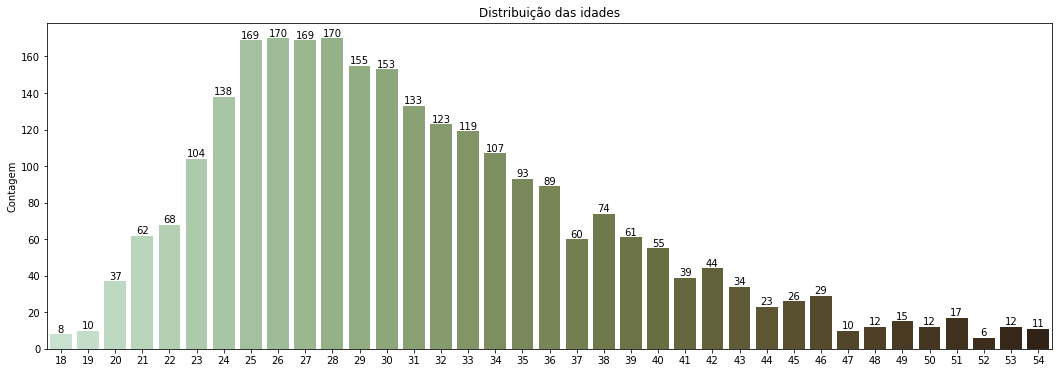

In [ ]:
df_idade = df["('P1_a ', 'Idade')"].dropna().astype('int').reset_index()
# df["('P1_a ', 'Idade')"] = df["('P1_a ', 'Idade')"].astype('int')

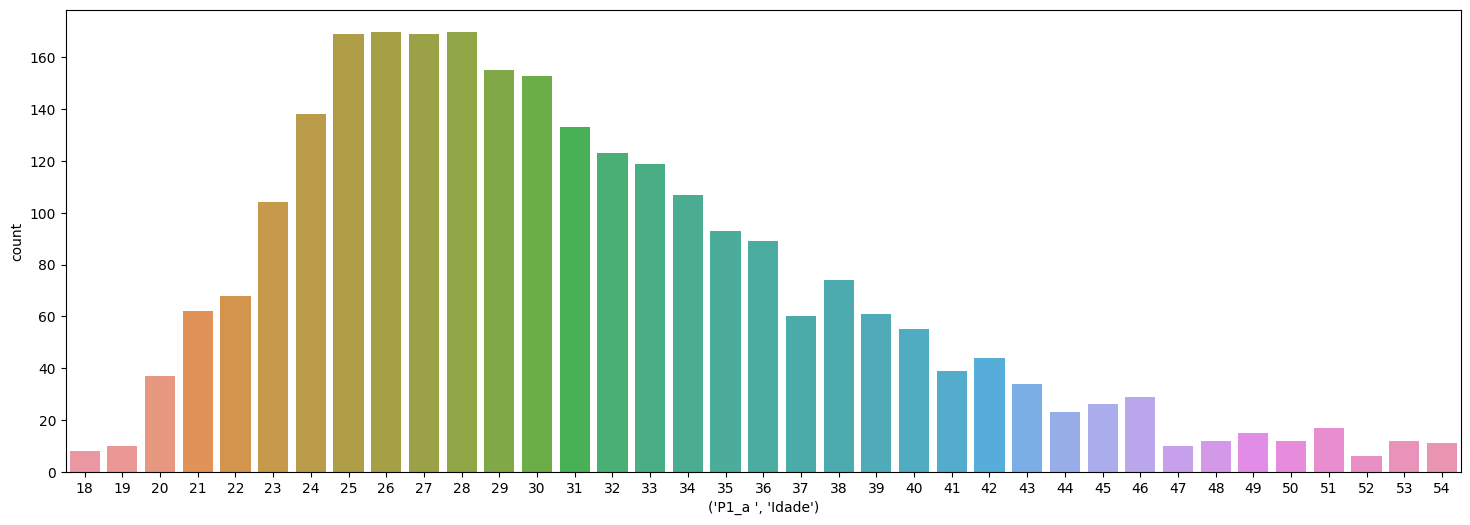

In [ ]:
fig = plt.figure(figsize=(18,6))
ax = sns.countplot(data=df_idade, x="('P1_a ', 'Idade')", palette='ch:22')
ax.bar_label(ax.containers[0])
ax.set(xlabel="",ylabel="Contagem",title='Distribuição das idades')
plt.show()


In [23]:
df_a["('P2_a ', 'Qual sua situação atual de trabalho?')"].unique()

array(['Empregado (CLT)', 'Empreendedor ou Empregado (CNPJ)',
       'Servidor Público', 'Estagiário', 'Freelancer',
       'Prefiro não informar',
       'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)',
       'Vivo fora do Brasil e trabalho para empresa de fora do Brasil',
       'Trabalho na área Acadêmica/Pesquisador',
       'Somente Estudante (graduação)',
       'Desempregado, buscando recolocação',
       'Somente Estudante (pós-graduação)',
       'Desempregado e não estou buscando recolocação'], dtype=object)

In [29]:
df_a["Vínculo Empregativo"]=df_a["('P2_a ', 'Qual sua situação atual de trabalho?')"].replace({
    'Somente Estudante (graduação)': "Acadêmico",
    'Desempregado, buscando recolocação': "Desempregado",
    'Somente Estudante (pós-graduação)': "Acadêmico",
    'Desempregado e não estou buscando recolocação': "Desempregado",
    'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)': "Trabalho fora do Brasil",
    'Vivo fora do Brasil e trabalho para empresa de fora do Brasil': "Trabalho fora do Brasil",
    'Trabalho na área Acadêmica/Pesquisador': "Acadêmico",
    #'Empregado (CLT)', 
    #'Empreendedor ou Empregado (CNPJ)',
    #'Servidor Público', 
    #'Estagiário', 
    #'Freelancer',
    'Prefiro não informar':None
})
df_a["Vínculo Empregativo"].value_counts()

Empregado (CLT)                     1737
Empreendedor ou Empregado (CNPJ)     273
Acadêmico                            141
Desempregado                         139
Estagiário                           127
Servidor Público                     112
Trabalho fora do Brasil               80
Freelancer                            29
Name: Vínculo Empregativo, dtype: int64

In [25]:
df_a["Vínculo Empregativo"].value_counts()

Empregado (CLT)                           1737
Empreendedor ou Empregado (CNPJ)           273
Desempregado                               234
Estagiário                                 127
Servidor Público                           112
Trabalho fora do Brasil                     80
Trabalho na área Acadêmica/Pesquisador      46
Freelancer                                  29
Prefiro não informar                         7
Name: Vínculo Empregativo, dtype: int64

In [34]:
df_a[df_a["Vínculo Empregativo"]=="Empreendedor ou Empregado (CNPJ)"].groupby("('P2_e ', 'Cargo como Gestor')")["Vínculo Empregativo"].count()

('P2_e ', 'Cargo como Gestor')
Gerente/Head/Diretor/VP                      46
Supervisor/Coordenador                       11
Sócio ou C-level (CEO, CDO, CIO, CTO etc)    56
Team Leader/Tech Leader                      20
Name: Vínculo Empregativo, dtype: int64

In [39]:
df_a['Vínculo Empregativo2'] = [a if b!="Gerente/Head/Diretor/VP" else b if a =="Empreendedor ou Empregado (CNPJ)" else a for a,b in zip(df_a['Vínculo Empregativo'], df_a["('P2_e ', 'Cargo como Gestor')"])]

In [40]:
df_a["Vínculo Empregativo2"].value_counts()

Empregado (CLT)                     1737
Empreendedor ou Empregado (CNPJ)     227
Acadêmico                            141
Desempregado                         139
Estagiário                           127
Servidor Público                     112
Trabalho fora do Brasil               80
Gerente/Head/Diretor/VP               46
Freelancer                            29
Name: Vínculo Empregativo2, dtype: int64